In [1]:
import pandas as pd
import numpy as np
pd.set_option('max_columns',110)

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

## Data Loading

In [102]:
pd.read_sas('./data/hn19_all.sas7bdat', format = 'sas7bdat').shape

(8110, 717)

In [2]:
df_all = pd.read_sas('./data/hn19_all.sas7bdat', format = 'sas7bdat')
df_all = df_all.loc[df_all['HE_ht'].isna() == False]
df_all = df_all.loc[df_all['HE_wt'].isna() == False]

In [3]:
def obesity(x) : 
    if x < 18.5 : 
        return 0
    elif x < 23 : 
        return 1
    elif x < 25 : 
        return 2
    elif x < 30 :
        return 3
    elif x < 35 : 
        return 4
    else : 
        return 5
    
df_all['Obesity']=  df_all['HE_BMI'].apply(obesity)
df_all = df_all.query('age >= 20')

In [4]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(df_all, shuffle = True, stratify = df_all['Obesity'], random_state = 0)

## Feature Engineering

In [5]:
total_features = []

# 1. 기본변수

In [6]:
normal_features = np.array([
    ['region', '지역', 'cat'],
    ['town_t', '동읍면', 'cat'],
    ['apt_t', '아파트구분', 'cat'],
    ['sex', '성별', 'cat'],
    ['age', '만나이', 'num'],
    ['incm5', '소득5분위수(개인)', 'cat'],
    ['ho_incm5','소득5분위수(가구)','cat'],
    ['edu',  '교육수준', 'cat'],
    ['occp' , '직업', 'cat']
                                            ])
train_normal = train_data[normal_features[:,0]]
test_normal = test_data[normal_features[:,0]]

total_features.extend(normal_features)
train_normal.isna().sum().sum(), test_normal.isna().sum().sum()


(615, 184)

# 2. 건강설문조사

- 2-1. 가구조사

In [7]:
family_features = np.array([
    ['cfam', '가구원수', 'cat'],
    ['genertn' , '가구 세대구성', 'cat'],
    ['allownc', '기초생활수급여부' , 'cat'],
    ['house', '주택소유여부', 'cat'],
    ['live_t', '주택형태', 'cat'],
    ['marri_1' , '결혼여부', 'cat'],
    ['fam_rela', '가구주와의 관계', 'cat'],
    ['tins', '건강보험가입', 'cat'],
])

train_family = train_data[family_features[:,0]]
test_family = test_data[family_features[:,0]]

total_features.extend(family_features)

- 2-2. 이환

In [8]:
disease_features = np.array([
    ['D_1_1' , '주관적 건강 인식', 'cat'],
    ['D_2_1', '2주내 불편 여부' ,'cat'],
    ['DI1_dg' , '고혈압 진단 여부', 'cat'],
    ['DI2_dg', '이상지질혈증 진단 여부', 'cat'],
    ['DI3_dg' , '뇌졸중 진단 여부', 'cat'],
    ['DI4_dg', '심근경색증 혹은 협심증 진단 여부' , 'cat'],
    ['DI5_dg', '심근경색증 진단 여부', 'cat'],
    ['DI6_dg', '협심증 진단 여부', 'cat'],
   
    ['DM1_dg' , '관절염 진단 여부', 'cat'], # NA값이 많아 생략
    ['DM2_dg' , '골관절염 진단 여부', 'cat'],
    ['DM3_dg' , '류마티스성 관절염 진단 여부', 'cat'],
    ['DM4_dg' , '골다공증 진단 여부', 'cat'],

    ['DJ2_dg' , '폐결핵 진단 여부', 'cat'], 
    ['DJ4_dg', '천식 진단 여부' , 'cat'],
    
    ['DE1_dg', '당뇨병 진단 여부', 'cat'],
    ['DE2_dg' , '갑상선 진단 여부', 'cat'],
    
    ['DC1_dg', '위암 진단 여부', 'cat'],
    ['DC2_dg', '간암 진단 여부', 'cat'],
    ['DC3_dg', '대장암 진단 여부', 'cat'],
    ['DC4_dg', '유방암 진단 여부', 'cat'],
    ['DC5_dg', '자궁경부암 진단 여부', 'cat'],
    ['DC6_dg', '폐암 진단 여부', 'cat'],
    ['DC7_dg', '갑상선암 진단 여부', 'cat'],
    ['DC11_dg', '기타암 진단 여부', 'cat'],
    
    ['DF2_dg', '우울증 진단 여부', 'cat'],
    ['DL1_dg', '아토피피부염 진단 여부', 'cat'],
    ['DJ8_dg', '알레르기비염 진단 여부', 'cat'],
    ['DJ6_dg', '부비동염 진단 여부', 'cat'],
    ['DH4_dg', '중이염 진단 여부', 'cat'],
    ['DN1_dg', '신부전 진단 여부', 'cat'],
    ['DK8_dg', 'B형간염 진단 여부', 'cat'],
    ['DK9_dg', 'C형간염 진단 여부', 'cat'],
    ['DK4_dg', '간경변증 진단 여부', 'cat'],
    ['DM8_dg', '통풍 진단 여부', 'cat'],
    ['BP17_dg', '폐쇄성수면무호흡 진단 여부' , 'cat'],       
])

train_disease = train_data[disease_features[:,0]]
test_disease = test_data[disease_features[:,0]]

total_features.extend(disease_features)

- 2.3 의료 이용 

In [9]:
treated_features = np.array([    
    ['M_2_yr', '최근 1년 동안 본인이 병의원(치과 제외) 진료(검사 또는 치료)가 필요하였으나 받지 못한 적이 있습니까?', 'cat'],
])
train_treated = train_data[treated_features[:,0]]
test_treated = test_data[treated_features[:,0]]

total_features.extend(treated_features)

- 2-4. 예방접종 및 건강검진

In [10]:
medical_features = np.array([    
    ['BH9_11', '독감 예방접종 여부', 'cat'],
    ['BH1', '건강 검진 여부', 'cat'],
    ['BH2_61', '암 검진 여부', 'cat'],
    ])
    
train_medical = train_data[medical_features[:,0]]
test_medical = test_data[medical_features[:,0]]

total_features.extend(medical_features)

- 2-5. 활동제한 및 삶의 질

In [11]:
activity_features = np.array([    
    ['LQ4_00', '신체 혹은 정신 장애로 인한 제한 여부', 'cat'],
    ['LQ1_sb', '질병이나 손상으로 인해 하루종일 누워서 보내야 했던 날 여부', 'cat'],
    ['LQ2_ab' , '질병이나 손상으로 인해 결석 혹은 결근 여부' ,'cat'],
    ['LQ_1EQL' ,'운동능력 조사' , 'cat'],
    ['LQ_2EQL' ,'자기관리 조사' , 'cat'],
    ['LQ_3EQL' ,'일상활동 조사' , 'cat'],
    ['LQ_4EQL' ,'통증 및 불편 조사' , 'cat'],
    ['LQ_5EQL' ,'불안 및 우울 조사' , 'cat'],
    ['LQ_1HT', '계단오르기 조사', 'cat'], 
    ['LQ_2HT', '통증 조사', 'cat'], 
    ['LQ_3HT', '기운 조사', 'cat'], 
    ['LQ_4HT', '일하기 조사', 'cat'], 
    ['LQ_5HT', '우울 조사', 'cat'], 
    ['LQ_6HT', '기억 조사', 'cat'], 
    ['LQ_7HT', '잠자기 조사', 'cat'], 
    ['LQ_8HT', '행복 조사', 'cat'], 
    
])
    
train_activity = train_data[activity_features[:,0]]
test_activity = test_data[activity_features[:,0]]

total_features.extend(activity_features)

- 2-6. 손상(사고 및 중독)

In [12]:
harm_features = np.array([
    ['AC1_yr', '1년간 손상발생여부', 'cat']
])
train_harm = train_data[harm_features[:,0]]
test_harm = test_data[harm_features[:,0]]

total_features.extend(harm_features)

- 2-7. 입원 및 외래이용

In [13]:
admission_features = np.array([
    ['MH1_yr', '입원  여부', 'cat'],
    ['MO1_wk', '한의원 치료 여부', 'cat']
])
train_admission = train_data[admission_features[:,0]]
test_admission = test_data[admission_features[:,0]]

total_features.extend(admission_features)

- 2-8. 교육 및 경제활동

In [14]:
social_features = np.array([
    ['educ', '학력', 'cat'],
    ['graduat', '교육수준-졸업여부' ,'cat'],
    ['EC1_1', '경제활동','cat'],
    ['EC_lgw_2', '최장일자리 직종', 'cat'],
    ['EC_lgw_4', '최장일자리 관계', 'cat'],
    ['EC_pedu_1', '아버지 학력', 'cat'],
    ['EC_pedu_2', '어머니 학력', 'cat'],
])

train_social = train_data[social_features[:,0]]
test_social = test_data[social_features[:,0]]

total_features.extend(social_features)

- 2-9. 비만 및 체중조절

In [15]:
fat_features = np.array([
    ['BO1', '주관적 체형 인식', 'cat'],
    ['BO1_1', '체중변화', 'cat'],
    ['BO2_1', '몸무게 조절 노력', 'cat'],    
])

train_fat = train_data[fat_features[:,0]]
test_fat = test_data[fat_features[:,0]]

total_features.extend(fat_features)

- 2-10. 음주

In [16]:
drink_features = np.array([
    ['BD1', '음주경험','cat'],
    ['BD1_11', '음주빈도', 'cat'],
    ['BD2_1', '음주량', 'cat'],
    ['BD7_5', '음주 상담 여부', 'cat'],
    ])

train_drink = train_data[drink_features[:,0]]
test_drink = test_data[drink_features[:,0]]

total_features.extend(drink_features)

- 2-11. 안전의식

In [17]:
safety_features = np.array([
    ['BA2_12', '자가 안전벨트 착용', 'cat'],
    ['BA2_13', '타가 앞자리 안전벨트 착용', 'cat'],
    ['BA2_14', '타가 뒷자리 안전벨트 착용', 'cat'],
    ['BA2_2_1', '음주 후 자전거', 'cat'],
    ['BA2_2_3', '음주 후 오토바이', 'cat'],
    ['BA2_2_5', '음주 후 자동차', 'cat'],
    ['BA2_22', '음주 후 자동차 동승 횟수', 'cat'],
])

train_safety = train_data[safety_features[:,0]]
test_safety = test_data[safety_features[:,0]]

total_features.extend(safety_features)

-  2-12. 수면 및 정신건강

In [18]:
sleep_features = np.array([
    ['BP16_1', '주중 수면시간', 'num'],
    ['BP16_2', '주말 수면시간', 'num'],
    ['BP1', '스트레스 정도' ,'cat'],
    ['BP5', '2주 연속 우울감', 'cat'],
    ['BP6_10', '자살 생각', 'cat'],
    ['BP6_2', '자살 계획', 'cat'],
    ['BP6_31', '자살 시도', 'cat'],
    ['BP7', '정신 상담', 'cat']
])

train_sleep = train_data[sleep_features[:,0]]
test_sleep = test_data[sleep_features[:,0]]

total_features.extend(sleep_features)

- 2-13. 흡연

In [19]:
smoke_features = np.array([
    ['BS1_1', '흡연여부', 'cat'],
    ['BS12_37', '전자담배', 'cat'],
    ['BS12_1', '니코틴 전자담배', 'cat'],
])

train_smoke = train_data[smoke_features[:,0]]
test_smoke = test_data[smoke_features[:,0]]

total_features.extend(smoke_features)

- 2-14. 신체활동

In [20]:
physical_features = np.array([
    ['BE3_71', '업무중 고강도 운동', 'cat'],
    ['BE3_81', '업무중 중강도 운동', 'cat'],
    ['BE3_91', '이동중 운동 여부', 'cat'],
    ['BE3_75', '여가 고강도 운동', 'cat'],
    ['BE3_85', '여가 중강도 운동', 'cat'],
    ['BE8_1', '앉거나 누워있는 시간', 'num'],
    ['BE3_31', '10분 이상 걸은 날', 'cat'],
    ['BE5_1', '근력운동 일수', 'cat']
])

train_physical = train_data[physical_features[:,0]]
test_physical = test_data[physical_features[:,0]]

total_features.extend(physical_features)

# 3. 검진조사

- 3-1. 검진기본조사

In [21]:
checkup_features = np.array([
    ['HE_prg', '임신여부', 'cat'],
     ['HE_fst', '공복시간', 'num'], #이상치 많음
  
    ['HE_HPfh1', '아버지 고혈압 여부', 'cat'], 
    ['HE_HPfh2', '어머니 고혈압 여부', 'cat'], 
    ['HE_HPfh3', '형제자매 고혈압 여부', 'cat'], 

    ['HE_HLfh1', '아버지 고지혈증 여부', 'cat'], 
    ['HE_HLfh2', '어머니 고지혈증 여부', 'cat'], 
    ['HE_HLfh3', '형제자매 고지혈증 여부', 'cat'], 
    
    ['HE_IHDfh1', '아버지 허혈성심질환 여부', 'cat'], 
    ['HE_IHDfh2', '어머니 허혈성심질환 여부', 'cat'], 
    ['HE_IHDfh3', '형제자매 허혈성심질환 여부', 'cat'],
    
    ['HE_STRfh1', '아버지 뇌졸증 여부', 'cat'], 
    ['HE_STRfh2', '어머니 뇌졸증 여부', 'cat'], 
    ['HE_STRfh3', '형제자매 뇌졸증 여부', 'cat'], 
    
    ['HE_DMfh1', '아버지 당뇨병 여부', 'cat'], 
    ['HE_DMfh2', '어머니 당뇨병 여부', 'cat'], 
    ['HE_DMfh3', '형제자매 당뇨병 여부', 'cat'], 
    
    ['HE_THfh1', '아버지 갑상선질환 여부', 'cat'], 
    ['HE_THfh2', '어머니 갑상선질환 여부', 'cat'], 
    ['HE_THfh3', '형제자매 갑상선질환 여부', 'cat'], 
    
    ['HE_HBfh1', '아버지 B형간염 여부', 'cat'], 
    ['HE_HBfh2', '어머니 B형간염 여부', 'cat'], 
    ['HE_HBfh3', '형제자매 B형간염 여부', 'cat'], 
])

train_checkup = train_data[checkup_features[:,0]]
test_checkup = test_data[checkup_features[:,0]]

total_features.extend(checkup_features)

- 3-2. 혈압 측정

In [22]:
BP_features = np.array([
    ['HE_rPLS', '맥박 규칙, 불규칙', 'cat'],
    ['HE_sbp', '최종 수축기 혈압', 'num'],
    ['HE_dbp', '최종 이완기 혈압', 'num'],
    ['HE_HP', '고혈압 유병여부' ,'cat'],
])

train_BP = train_data[BP_features[:,0]]
test_BP = test_data[BP_features[:,0]]

total_features.extend(BP_features)

- 3.3 신체계측 : 비만에 직접적 영향을 준다고 판단해 삭제

- 3.4 혈액검사

In [23]:
blood_features = np.array([
    ['HE_glu', '공복 혈당', 'num'],
    ['HE_HbA1c', '당화혈색소' ,'num'],
    ['HE_insulin', '인슐린' ,'num'],
    ['HE_HDL_st2', 'HDL-콜레스테롤(보정값)' ,'num'],
    ['HE_TG', '중성지방' ,'num'],
    ['HE_LDL_drct', 'LDL-콜레스테롤' ,'num'], #NA값이 많아 생략
    ['HE_HBsAg', 'B형간염표면항원', 'num'],
    ['HE_ast', 'AST(SGOT)', 'num'],
    ['HE_alt', 'ALT(SGPT)', 'num'],
    ['HE_hcv', 'C형간염항체(수치)', 'num'],
    ['HE_HB', '헤모글로빈', 'num'],
    ['HE_HCT', '헤마토크리트', 'num'],
    ['HE_BUN', '혈중요소질소', 'num'],
    ['HE_crea', '혈중크레아티닌', 'num'],
    ['HE_WBC', '백혈구', 'num'],
    ['HE_RBC', '적혈구', 'num'],
    ['HE_Bplt', '혈소판', 'num'],
    ['HE_Uacid', '요산', 'num'],
    
])

train_blood = train_data[blood_features[:,0]]
test_blood = test_data[blood_features[:,0]]

total_features.extend(blood_features)

- 3.5 소변검사

In [24]:
urine_features = np.array([
    ['HE_Uph', '요산도', 'num'],
    ['HE_Unitr', '아질산염', 'cat'],
    ['HE_Usg', '요비중', 'num'],
    ['HE_Upro', '요단백', 'cat'],
    ['HE_Uglu', '요당', 'cat'],
    ['HE_Uket', '요케톤', 'cat'],
    ['HE_Ubil', '요빌리루빈', 'cat'],
    ['HE_Ubld', '요잠혈', 'cat'],
    ['HE_Uro', '유로빌리노겐', 'cat'],
    ['HE_Ucrea', '요크레아티닌', 'num'],
    ['HE_Una', '요나트륨', 'num'],
   ['HE_Ualb', '요알부민', 'num'], #이상치가 많아 생략
   ['HE_Ukal', '요칼륨', 'num'], #이상치가 많아 생략
     
])

train_urine = train_data[urine_features[:,0]]
test_urine = test_data[urine_features[:,0]]

total_features.extend(urine_features)

- 3.6 폐기능 검사 : 미검사자가 절반가까이 됨

In [25]:
"""
lung_features = np.array([
    ['HE_fvc', '노력성 폐활량', 'num'],
    ['HE_fev1', '1초간 노력성 호기량', 'num'],
    ['HE_fev6', '6초간 노력성 호기량', 'num'],
    ['HE_fef25_75', '노력성 호기 중간유량', 'num'],
    ['HE_pef', '최대 호기유속', 'num'],
    ['HE_COPD', '폐기능 판정결과', 'cat'],
    ['HE_cough1', '연속 3개월이상 기침 경험여부', 'cat'],
    ['HE_sput1', '연속 3개월이상 가래 경험여부', 'cat'],
    ['HE_PFTdr', '만성폐쇄성폐질환 의사진단 여부', 'cat'],
])

train_lung = train_data[lung_features[:,0]]
test_lung = test_data[lung_features[:,0]]
"""

"\nlung_features = np.array([\n    ['HE_fvc', '노력성 폐활량', 'num'],\n    ['HE_fev1', '1초간 노력성 호기량', 'num'],\n    ['HE_fev6', '6초간 노력성 호기량', 'num'],\n    ['HE_fef25_75', '노력성 호기 중간유량', 'num'],\n    ['HE_pef', '최대 호기유속', 'num'],\n    ['HE_COPD', '폐기능 판정결과', 'cat'],\n    ['HE_cough1', '연속 3개월이상 기침 경험여부', 'cat'],\n    ['HE_sput1', '연속 3개월이상 가래 경험여부', 'cat'],\n    ['HE_PFTdr', '만성폐쇄성폐질환 의사진단 여부', 'cat'],\n])\n\ntrain_lung = train_data[lung_features[:,0]]\ntest_lung = test_data[lung_features[:,0]]\n"

- 3-7-4. 구강면접

In [26]:
teeth_features = np.array([
    ['OR1', '본인인지 구강건강상태', 'cat'],
    ['O_pain', '최근 1년간 치통 경험유무', 'cat'],
    ['O_ortho', '교정치료 경험 유무', 'cat'],
    ['BM1_0', '어제 하루 칫솔질 여부', 'cat'],
    ['BM1_1', '칫솔질 시기: 아침식사 전', 'cat'],
    ['BM1_2', '칫솔질 시기: 아침식사 후', 'cat'],
    ['BM1_3', '칫솔질 시기: 점심식사 전', 'cat'],
    ['BM1_4', '칫솔질 시기: 점심식사 후', 'cat'],
    ['BM1_5', '칫솔질 시기: 저녁식사 전', 'cat'],
    ['BM1_6', '칫솔질 시기: 저녁식사 후', 'cat'],
    ['BM1_7', '칫솔질 시기: 간식 후', 'cat'],
    ['BM1_8', '칫솔질 시기: 잠자기 전', 'cat'],
    ['BM2_1', '사용용품: 치실(Floss)', 'cat'],
    ['BM2_3', '사용용품: 치간칫솔', 'cat'],
    ['BM2_2', '사용용품: 양치용액(구강세정액)', 'cat'],
    ['BM2_4', '사용용품: 전동칫솔', 'cat'],
    ['BM2_5', '사용용품: 기타', 'cat'],
    ['BM13', '운동 또는 사고로 인한 치아손상 경험여부', 'cat'],
    ['BM7', '씹기 문제', 'cat'],
    ['BM14', '치과진료 미치료 여부', 'cat'],
])

train_teeth = train_data[teeth_features[:,0]]
test_teeth = test_data[teeth_features[:,0]]

total_features.extend(teeth_features)

- 3.8 악력

In [27]:
grip_features = np.array([
    ['GS_use', '주요 사용하는 손', 'cat'],
    ['GS_mea_r_1', '1차 악력측정_오른손', 'num'],
    ['GS_mea_l_1', '1차 악력측정_왼손', 'num'],
    ['GS_mea_r_2', '2차 악력측정_오른손', 'num'],
    ['GS_mea_l_2', '2차 악력측정_왼손', 'num'],
    ['GS_mea_r_3', '3차 악력측정_오른손', 'num'],
    ['GS_mea_l_3', '3차 악력측정_왼손', 'num'],
    
])

train_grip = train_data[grip_features[:,0]]
test_grip = test_data[grip_features[:,0]]

total_features.extend(grip_features)

# 4. 영양조사

- 4.1 식생활조사
    - 영유아 식생활  제외
    - 모두 미응답자 300명 이상

In [28]:
EH_features = np.array([ #Eating Habits
    ['L_BR', '1일전 아침 결식', 'cat'],
    ['L_LN', '1일전 점심 결식', 'cat'],
    ['L_DN', '1일전 저녁 결식', 'cat'],
    ['L_BR_FQ', '1년간 주간 아침 식사 빈도', 'cat'],
    ['L_LN_FQ', '1년간 주간 점심 식사 빈도', 'cat'],
    ['L_DN_FQ', '1년간 주간 저녁 식사 빈도', 'cat'],
    ['L_BR_TO', '1년간 아침 식사 동반자 여부', 'cat'],
    ['L_LN_TO', '1년간 점심 식사 동반자 여부', 'cat'],
    ['L_DN_TO', '1년간 저녁 식사 동반자 여부', 'cat'],
    ['L_OUT_FQ', '외식 횟수', 'cat'],
    ['LS_1YR', '식이보충제', 'cat'],
    ['LK_EDU', '영양교육', 'cat'],
    ['LK_LB_CO', '영양표시 인지여부', 'cat'],
    
])

train_EH = train_data[EH_features[:,0]]
test_EH = test_data[EH_features[:,0]]

total_features.extend(EH_features)

- 4.2 식품 섭취 조사

- 4-2-1. 식품섭취조사(개인별 24시간 회상조사) – 조사자료

In [29]:
intake_features = np.array([    
    ['N_DIET', '식사요법여부', 'cat'],
    ['N_WAT_C', '물섭취량(컵)', 'num'],
    
    ['N_EN', '에너지', 'num'],
    ['N_WATER', '수분', 'num'],
    ['N_PROT', '단백질', 'num'],
    ['N_FAT', '지방', 'num'],
    ['N_SFA', '포화지방산', 'num'],
    ['N_MUFA', '단일불포화지방산', 'num'],
    ['N_PUFA', '다가불포화지방산', 'num'],
    ['N_N3', 'n-3계 지방산', 'num'],
    ['N_N6', 'n-6계 지방산', 'num'],
    ['N_CHOL', '콜레스테롤', 'num'],
    ['N_CHO', '탄수화물', 'num'],
    ['N_TDF', '식이섬유', 'num'],
    ['N_SUGAR', '당', 'num'],
    ['N_CA', '칼슘', 'num'],
    ['N_PHOS', '인', 'num'],
    ['N_FE', '철', 'num'],
    ['N_NA', '나트륨', 'num'],
    ['N_K', '칼륨', 'num'],
    ['N_VA_RAE', '비타민A', 'num'],
    ['N_CAROT', '베타카로틴', 'num'],
    ['N_RETIN', '레티놀', 'num'],
    ['N_B1', '티아민', 'num'],
    ['N_B2', '리보플라빈', 'num'],
    ['N_NIAC', '나이아신', 'num'],
    ['N_FOLATE', '엽산', 'num'],
    ['N_VITC', '비타민C', 'num'],
])

train_intake = train_data[intake_features[:,0]]
test_intake = test_data[intake_features[:,0]]

total_features.extend(intake_features)

In [30]:
names = [
  'normal',  
  'family', 'disease', 'treated', 'medical', 'activity', 'harm', 'admission', 'social', 'fat', 'drink', 'safety', 'sleep', 'smoke','physical',
    'checkup', 'BP', 'blood', 'urine', 'teeth', 'grip', 
    'EH', 'intake'
]

In [31]:
def treat_categorical_data(train, test, column) :
    from sklearn.preprocessing import OneHotEncoder
    encoder = OneHotEncoder(handle_unknown='ignore')
    train_oh = encoder.fit_transform(train[[column]]).toarray()
    test_oh = encoder.transform(test[[column]]).toarray()
    
    train_OH = pd.DataFrame(train_oh, columns = encoder.get_feature_names([column]))
    test_OH = pd.DataFrame(test_oh, columns = encoder.get_feature_names([column]))
    return train_OH, test_OH

def treat_numerical_data(train, test, column) : 
    _, bins = pd.qcut(train[column], q=5, retbins=True, duplicates='drop')
    train_num =pd.DataFrame(train[column].apply(lambda x : return_group(x, bins))).rename(columns = {column:column+'_5group'})
    test_num = pd.DataFrame(test[column].apply(lambda x : return_group(x, bins))).rename(columns = {column:column+'_5group'})
    return train_num, test_num
    
def return_group(x, bins) : 
    num = 0
    for b in bins : 
        if x < b : 
            return num
        else  :
            num += 1
    return num
    
def return_group_data(train, test, features) : 
    from itertools import combinations
    
    numerical_features = [x[0] for x in features if x[2] == 'num']
    categorical_features = [x[0] for x in features if x[2] == 'cat']
    
    for column in numerical_features : 
        train[column] = train[column].fillna(train[column].mean())
        test[column] = test[column].fillna(train[column].mean())
        g_train, g_test = treat_numerical_data(train, test, column)
        train = pd.concat([train, g_train], axis = 1)
        test = pd.concat([test, g_test], axis = 1)
        categorical_features.append(column + '_5group')
    
    for column in categorical_features : 
        fill_value = train[column].mode().values[0]
        train[column] = train[column].fillna(fill_value)
        test[column] = test[column].fillna(fill_value)
    
    for column in categorical_features : 
        train_oh, test_oh = treat_categorical_data(train, test, column)
        train = pd.concat([train, train_oh], axis = 1).drop(columns = column)
        test = pd.concat([test, test_oh], axis = 1).drop(columns = column)

    return train, test

# Modeling

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from lightgbm import LGBMClassifier
from tqdm import tqdm

model = LGBMClassifier()

y_train = train_data['Obesity'].values
y_test = test_data['Obesity'].values

In [33]:
X_train = pd.DataFrame()
X_test = pd.DataFrame()

for name in names : 
    train_df = globals()['train_'+name].reset_index(drop = True)
    test_df = globals()['test_'+name].reset_index(drop = True)
    features = globals()[name+'_features']
    
    new_train, new_test = return_group_data(train_df, test_df, features)
    
    X_train = pd.concat([X_train, new_train], axis = 1)
    X_test = pd.concat([X_test, new_test], axis = 1)
    model.fit(new_train, y_train)
    p = model.predict(new_test)
    print('==='*10)
    print(name, 'DATA')
    print('raw shape : ', train_df.shape[1], '-> new shape : ', new_train.shape[1])
    print('score :', accuracy_score(y_test, p))
    print('==='*10)
    print('')

normal DATA
raw shape :  9 -> new shape :  51
score : 0.36451612903225805

family DATA
raw shape :  8 -> new shape :  41
score : 0.37225806451612903

disease DATA
raw shape :  35 -> new shape :  104
score : 0.38387096774193546

treated DATA
raw shape :  1 -> new shape :  4
score : 0.38838709677419353

medical DATA
raw shape :  3 -> new shape :  9
score : 0.38838709677419353

activity DATA
raw shape :  16 -> new shape :  70
score : 0.36

harm DATA
raw shape :  1 -> new shape :  3
score : 0.38838709677419353

admission DATA
raw shape :  2 -> new shape :  6
score : 0.38838709677419353

social DATA
raw shape :  7 -> new shape :  55
score : 0.3735483870967742

fat DATA
raw shape :  3 -> new shape :  15
score : 0.5670967741935484

drink DATA
raw shape :  4 -> new shape :  21
score : 0.4070967741935484

safety DATA
raw shape :  7 -> new shape :  39
score : 0.37032258064516127

sleep DATA
raw shape :  8 -> new shape :  33
score : 0.3690322580645161

smoke DATA
raw shape :  3 -> new shape :  10

In [38]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import StratifiedKFold

In [39]:
def return_best_rf_model(X_train_data, target_data, rf_pbounds, num_init, num_iter, seed) : 
    from bayes_opt import BayesianOptimization
    from sklearn.model_selection import cross_val_score
    
    skf = StratifiedKFold(n_splits = 4, shuffle = True, random_state = seed)
    def rf_opt(n_estimators, max_depth, min_samples_split):
    
        params = {
            'n_estimators' : int(round(n_estimators)),
            'max_depth': int(round(max_depth)),
            'min_samples_split' : int(round(min_samples_split)),
            'random_state' : seed,
            'n_jobs' : -1
        }

        rf_cls = RandomForestClassifier(**params)
        scores = cross_val_score(rf_cls, X_train_data, target_data,scoring = 'accuracy', cv=skf, n_jobs=-1)
        mean_score = np.mean(scores)
        return mean_score


    BO_rf = BayesianOptimization(f = rf_opt, pbounds = rf_pbounds, random_state=seed)
    BO_rf.maximize(init_points=num_init, n_iter=num_iter)
    max_params = BO_rf.max['params']
    max_params['n_estimators'] = int(round(max_params['n_estimators']))
    max_params['max_depth'] = int(round(max_params['max_depth']))
    max_params['min_samples_split'] = int(round(max_params['min_samples_split']))
    max_params['n_jobs'] = -1
    max_params['random_state'] = seed
    print(max_params)

    model_rf = RandomForestClassifier(**max_params)
    return model_rf

In [40]:
def return_best_lgbm_model(X_train_data, target_data, lgbm_pbounds, num_init, num_iter, seed) : 
    from bayes_opt import BayesianOptimization
    from sklearn.model_selection import cross_val_score
    
    skf = StratifiedKFold(n_splits = 4, shuffle = True, random_state = seed)
    def lgbm_opt(learning_rate, n_estimators, max_depth, subsample, colsample_bytree, min_child_samples):
    
        params = {
            'learning_rate' : learning_rate,
            'n_estimators' : int(round(n_estimators)),
            'max_depth': int(round(max_depth)),
            'subsample' : subsample,
            'colsample_bytree' : colsample_bytree,
            'min_child_samples' : int(round(min_child_samples)),
            'random_state' : seed,
            'n_jobs' : -1
        }

        lgbm_cls = LGBMClassifier(**params)
        scores = cross_val_score(lgbm_cls, X_train_data, target_data,scoring = 'accuracy', cv=skf, n_jobs=-1)
        mean_score = np.mean(scores)
        return mean_score

    BO_lgbm = BayesianOptimization(f = lgbm_opt, pbounds = lgbm_pbounds, random_state=seed)
    BO_lgbm.maximize(init_points=num_init, n_iter=num_iter)
    max_params = BO_lgbm.max['params']
    max_params['n_estimators'] = int(round(max_params['n_estimators']))
    max_params['max_depth'] = int(round(max_params['max_depth']))
    max_params['min_child_samples'] = int(round(max_params['min_child_samples']))
    max_params['n_jobs'] = -1
    max_params['random_state'] = seed
    print(max_params)

    model_lgbm = LGBMClassifier(**max_params)
    return model_lgbm

In [41]:
def return_best_xgb_model(X_train_data, target_data, xgb_pbounds, num_init, num_iter, seed) : 
    from bayes_opt import BayesianOptimization
    from sklearn.model_selection import cross_val_score
    
    skf = StratifiedKFold(n_splits = 4, shuffle = True, random_state = seed)
    def xgb_opt(learning_rate, n_estimators, max_depth, subsample, colsample_bytree):
    
        params = {
            'learning_rate' : learning_rate,
            'n_estimators' : int(round(n_estimators)),
            'max_depth': int(round(max_depth)),
            'subsample' : subsample,
            'colsample_bytree' : colsample_bytree,
            'random_state' : seed,
            'n_jobs' : -1
        }

        xgb_cls = XGBClassifier(**params)
        scores = cross_val_score(xgb_cls, X_train_data, target_data,scoring = 'accuracy', cv=skf, n_jobs=-1)
        mean_score = np.mean(scores)
        return mean_score

    BO_xgb = BayesianOptimization(f = xgb_opt, pbounds = xgb_pbounds, random_state=seed)
    BO_xgb.maximize(init_points=num_init, n_iter=num_iter)
    max_params = BO_xgb.max['params']
    max_params['n_estimators'] = int(round(max_params['n_estimators']))
    max_params['max_depth'] = int(round(max_params['max_depth']))
    max_params['n_jobs'] = -1
    max_params['random_state'] = seed
    print(max_params)

    model_xgb = XGBClassifier(**max_params)
    return model_xgb

In [42]:
lgbm_pbounds = {'learning_rate' : (0.01,0.1),
           'n_estimators' : (30,300),
           'max_depth' : (5,30),
           'subsample' : (0.4,1),
           'colsample_bytree' : (0.4,1.0),
           'min_child_samples' : (20, 40)
           }

xgb_pbounds = {'learning_rate' : (0.01,0.1),
           'n_estimators' : (30,300),
           'max_depth' : (2,15),
           'subsample' : (0.4,1),
           'colsample_bytree' : (0.4,1.0)
           }

rf_pbounds = {
           'n_estimators' : (30,300),
           'max_depth' : (10,50),
           'min_samples_split' : (2, 30),            
           }

In [43]:
def return_estimators() : 
    from datetime import datetime
    print('Random Forest Optimization Initiated At : ', str(datetime.now()))
    print('')
    model_rf = return_best_rf_model(X_train, y_train, rf_pbounds, 20,20,2022)
    print('');print('')

    print('LGBM CLassifier Optimization Initiated At : ', str(datetime.now()))
    print('')
    model_lgbm = return_best_lgbm_model(X_train, y_train, lgbm_pbounds, 20,20,2022)
    print(''); print('')

    print('XGB CLassifier Optimization Initiated At : ', str(datetime.now()))
    print('')
    model_xgb = return_best_xgb_model(X_train, y_train, xgb_pbounds, 20,20,2022)
    print(''); print('')
    
    estimators =[ 
                                ('RF', model_rf), 
                                ('LGBM', model_lgbm),
                                ('XGB', model_xgb),
                                ]    

    return estimators

In [44]:
estimators = return_estimators()

Random Forest Optimization Initiated At :  2022-01-11 04:20:24.820558

|   iter    |  target   | max_depth | min_sa... | n_esti... |
-------------------------------------------------------------
|  1        |  0.5745   |  10.37    |  15.97    |  60.61    |
|  2        |  0.5795   |  12.0     |  21.19    |  161.5    |
|  3        |  0.5849   |  45.91    |  20.13    |  272.2    |
|  4        |  0.5803   |  38.85    |  25.28    |  253.4    |
|  5        |  0.581    |  43.34    |  28.8     |  129.4    |
|  6        |  0.5846   |  29.79    |  11.51    |  197.2    |
|  7        |  0.5829   |  49.1     |  4.7      |  230.9    |
|  8        |  0.5797   |  21.7     |  10.36    |  233.2    |
|  9        |  0.5782   |  10.75    |  16.66    |  263.4    |
|  10       |  0.5864   |  25.55    |  7.941    |  158.3    |
|  11       |  0.5889   |  32.59    |  11.78    |  293.5    |
|  12       |  0.5808   |  11.51    |  24.24    |  126.6    |
|  13       |  0.5788   |  39.92    |  27.61    |  130.6    |

|  23       |  0.6003   |  0.9058   |  0.07093  |  18.0     |  27.04    |  117.8    |  0.6722   |
|  24       |  0.6096   |  0.859    |  0.05592  |  6.829    |  38.26    |  203.5    |  0.8079   |
|  25       |  0.6057   |  0.6573   |  0.08271  |  26.03    |  28.1     |  87.42    |  0.7753   |
|  26       |  0.6006   |  0.6879   |  0.09697  |  7.267    |  38.12    |  204.1    |  0.5018   |
|  27       |  0.6089   |  0.4281   |  0.06551  |  26.85    |  27.16    |  87.56    |  0.6941   |
|  28       |  0.6027   |  0.7131   |  0.05439  |  28.79    |  20.3     |  138.8    |  0.6743   |
|  29       |  0.6055   |  0.9785   |  0.07137  |  6.716    |  20.53    |  151.2    |  0.6886   |
|  30       |  0.6092   |  0.8815   |  0.01412  |  6.915    |  37.81    |  203.1    |  0.6789   |
|  31       |  0.6111   |  0.5341   |  0.05075  |  26.6     |  35.27    |  161.6    |  0.5331   |
|  32       |  0.6083   |  0.6873   |  0.01693  |  27.71    |  34.15    |  254.7    |  0.7883   |
|  33       |  0.604

|  36       |  0.6152   |  0.5981   |  0.02068  |  6.904    |  128.2    |  0.8386   |
|  37       |  0.6036   |  0.6688   |  0.08663  |  6.581    |  128.2    |  0.597    |
|  38       |  0.6096   |  0.5371   |  0.09938  |  6.21     |  127.8    |  0.9311   |
|  39       |  0.6072   |  0.9381   |  0.02367  |  3.305    |  290.8    |  0.6222   |
|  40       |  0.6122   |  0.542    |  0.05852  |  6.452    |  128.2    |  0.8977   |




In [47]:
models = []
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=2022)
for model_name, model in estimators : 
    model.fit(X_train, y_train)
    scores = cross_val_score(model, X_train, y_train,scoring = 'accuracy', cv=skf, n_jobs=-1)
    print(model.__class__.__name__, np.mean(scores))
    models.append(model)

RandomForestClassifier 0.5846445124212087
LGBMClassifier 0.6154055431961438
[04:52:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier 0.6063709677419354


In [117]:
voting = VotingClassifier(estimators, voting = 'soft', weights=(1,2,1.5))
models.append(voting)

In [122]:
preds = []
skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=2022)
model = voting
preds = []
for train_idx, valid_idx in skf.split(X_train.index, y_train) : 
    X_tr = X_train.iloc[train_idx]
    X_val = X_train.iloc[valid_idx]

    y_tr = y_train[train_idx]
    y_val = y_train[valid_idx]

    model.fit(X_tr, y_tr)

    pred = model.predict_proba(X_test)
    preds.append(pred)
p = np.mean(preds, axis = 0)
p = np.argmax(p, axis = 1)
score  = accuracy_score(y_test, p)
print(score)

[15:16:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:16:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:16:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:16:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

In [ ]:
import umap

embedding = umap.UMAP(n_neighbors=6,
                      min_dist=0.3,
                      metric='correlation').fit_transform(X_test)

plt.figure(figsize = (12,8))
plt.subplot(1,2,1)
legends = ['저체중','정상체중','과체중','제1도비만','제2도비만','제3도비만']
plt.scatter(embedding[:, 0], embedding[:, 1], c=y_test, s=10, cmap="tab10")
plt.title('정답지')
plt.axis("off")

plt.subplot(1,2,2)
plt.scatter(embedding[:, 0], embedding[:, 1], c=y_test, s=10, cmap="tab10")
plt.title('예측지')
plt.axis("off")

plt.savefig('모형의 예측 분포')
plt.show()

In [49]:
import shap
from itertools import combinations
from sklearn.model_selection import cross_val_score

In [ ]:
rf_explainer = shap.TreeExplainer(models[0])
rf_shap_values = rf_explainer.shap_values(X_train)
lgbm_explainer = shap.TreeExplainer(models[1])
lgbm_shap_values = lgbm_explainer.shap_values(X_train)
xgb_explainer = shap.TreeExplainer(models[2])
xgb_shap_values = xgb_explainer.shap_values(X_train)

In [ ]:
rf_top_features = sorted(list(zip(X_train.columns, rf_shap_values[0].mean(axis = 0))), key = lambda x : x[1], reverse = True)
lgbm_top_features = sorted(list(zip(X_train.columns, lgbm_shap_values[0].mean(axis = 0))), key = lambda x : x[1], reverse = True)
xgb_top_features = sorted(list(zip(X_train.columns, xgb_shap_values[0].mean(axis = 0))), key = lambda x : x[1], reverse = True)

In [81]:
# EDA용 패키지 불러오기
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

# Python에서 한글 폰트 설정
local_font_path = "c:/Windows/Fonts/malgun.ttf"
import matplotlib.font_manager as fm
plt.rc('font', family=fm.FontProperties(fname=local_font_path).get_name())
# 마이너스 부호 깨지는 현상 방지
plt.rc('axes', unicode_minus=False)

In [94]:
class_names = ['저체중', '정상체중', '과체중', '제1도비만', '제2도비만', '제3도비만']

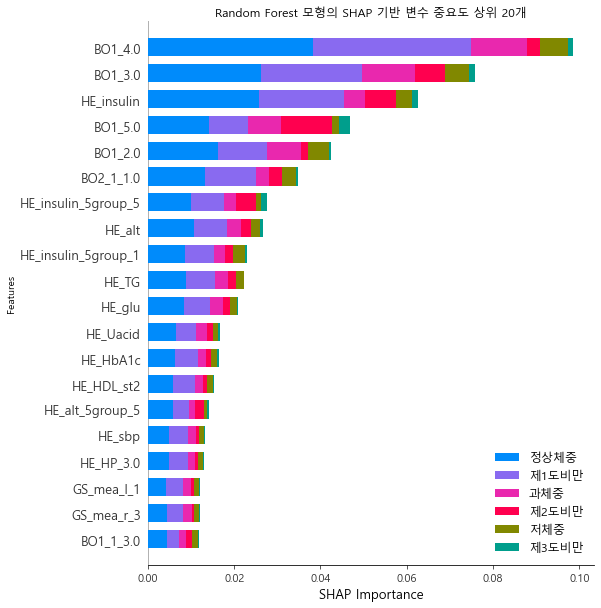

In [95]:
title = 'Random Forest 모형의 SHAP 기반 변수 중요도 상위 20개'
shap.summary_plot(rf_shap_values, X_train, plot_type='bar', show = False, plot_size = (8,10), class_names= class_names)
plt.xlabel('SHAP Importance')
plt.ylabel('Features')
plt.title(title)
plt.savefig(title + '.png',  bbox_inches="tight")

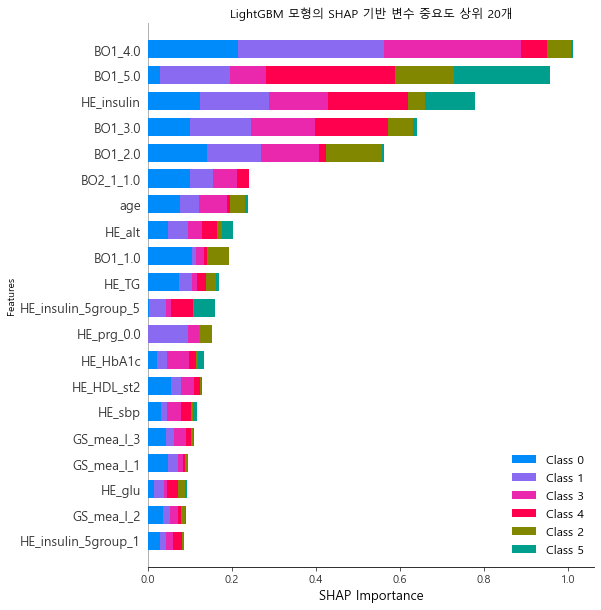

In [91]:
title = 'LightGBM 모형의 SHAP 기반 변수 중요도 상위 20개'
shap.summary_plot(lgbm_shap_values, X_train, plot_type='bar', show = False, plot_size = (8,10), class_names= class_names)
plt.xlabel('SHAP Importance')
plt.ylabel('Features')
plt.title(title)
plt.savefig(title + '.png',  bbox_inches="tight")

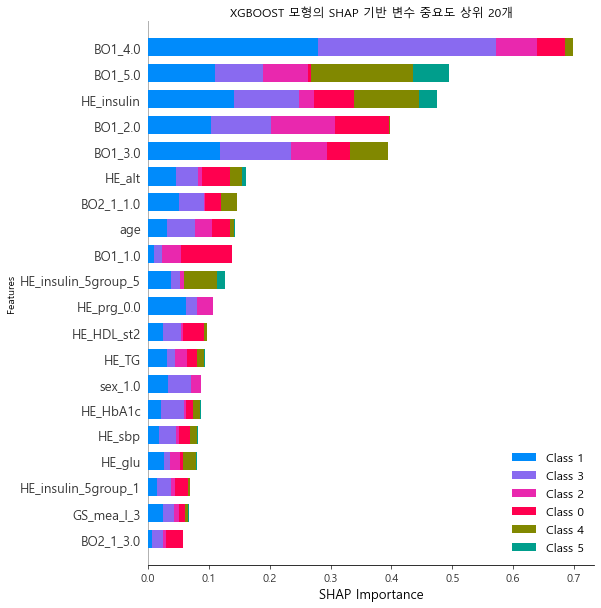

In [92]:
title = 'XGBOOST 모형의 SHAP 기반 변수 중요도 상위 20개'
shap.summary_plot(xgb_shap_values, X_train, plot_type='bar', show = False, plot_size = (8,10), class_names= class_names)
plt.xlabel('SHAP Importance')
plt.ylabel('Features')
plt.title(title)
plt.savefig(title + '.png',  bbox_inches="tight")